In [1]:
import tensorflow as tf
import os
from pathlib import Path
import urllib.request as request
import numpy as np
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = (224, 224)

In [3]:
model = tf.keras.applications.VGG16(
    include_top=True, weights="imagenet", input_tensor=None, input_shape=None, classes=1000 
)

In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
model.save("VGG16_full_model.h5")

In [6]:
model.layers[1].padding

'same'

In [7]:
data_URL = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

# create a directory
def create_dirs(dir_path):
    os.makedirs(dir_path, exist_ok=True)
    print(f"{dir_path} directory created")
    
ROOT_DATA_DIR = "data"
create_dirs(ROOT_DATA_DIR)


data_zip_file = "data.zip"
data_zip_path = os.path.join(ROOT_DATA_DIR, data_zip_file)

if not os.path.isfile(data_zip_file):
    print("downloading data...")
    filename, headers = request.urlretrieve(data_URL, data_zip_path)
    print(f"filename: {filename} created with info \n{headers}")
else:
    print(f"file is already present")

data directory created
downloading data...
filename: data\data.zip created with info 
Content-Type: application/zip
Content-Length: 47286322
Connection: close
Date: Sun, 27 Mar 2022 17:39:04 GMT
Last-Modified: Wed, 15 Mar 2017 18:46:00 GMT
ETag: "5f8c32a6554f6acb4d649776e7735e48"
x-amz-version-id: null
Accept-Ranges: bytes
Server: AmazonS3
X-Cache: Hit from cloudfront
Via: 1.1 7ddf939a79757069f5b9d04b0ce928ce.cloudfront.net (CloudFront)
X-Amz-Cf-Pop: BLR50-C1
X-Amz-Cf-Id: mxolgoePuJOJZ8Lo9SwOHNuSOOkNq1JMwORnQ7s7OC9bqBw3eODWLA==
Age: 80143




In [8]:
from zipfile import ZipFile

unzip_data_dirname = "unzip_data_dir"
unzip_data_dir = os.path.join(ROOT_DATA_DIR, unzip_data_dirname)

if not os.path.exists(unzip_data_dir):
    os.makedirs(unzip_data_dir, exist_ok=True)
    with ZipFile(data_zip_path) as f:
        f.extractall(unzip_data_dir)
else:
    print(f"data already extacted")

data already extacted


In [9]:
main_data_dir = Path("./data/unzip_data_dir/hymenoptera_data/train")
main_data_dir

WindowsPath('data/unzip_data_dir/hymenoptera_data/train')

In [10]:
BATCH_SIZE = 32
pixels = 224
IMAGE_SIZE = (pixels, pixels)


In [11]:
datagen_kwargs = dict(rescale=1./255, validation_split=0.20)

dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE)

In [12]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)


valid_generator = valid_datagen.flow_from_directory(
    main_data_dir, subset="validation", shuffle=False, **dataflow_kwargs)


do_data_augmentation = False

if do_data_augmentation:
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotational_range=40,
        horizontal_flip=True,
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        shear_range=0.2, 
        zoom_range=0.2, 
        **datagen_kwargs)
else:
    train_datagen = valid_datagen

train_generator = train_datagen.flow_from_directory(
    main_data_dir, subset="training", shuffle=True, **dataflow_kwargs
)


Found 48 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [13]:
RGB_IMAGE_SIZE = (pixels, pixels, 3)


vgg = tf.keras.applications.vgg16.VGG16(
    input_shape=RGB_IMAGE_SIZE,
    weights="imagenet",
    include_top=False
)

In [14]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
for layer in vgg.layers:
    print(f"{layer.name:20s}: {layer.trainable}")

input_2             : True
block1_conv1        : True
block1_conv2        : True
block1_pool         : True
block2_conv1        : True
block2_conv2        : True
block2_pool         : True
block3_conv1        : True
block3_conv2        : True
block3_conv3        : True
block3_pool         : True
block4_conv1        : True
block4_conv2        : True
block4_conv3        : True
block4_pool         : True
block5_conv1        : True
block5_conv2        : True
block5_conv3        : True
block5_pool         : True


In [16]:
for layer in vgg.layers:
    layer.trainable = False

In [17]:
for layer in vgg.layers:
    print(f"{layer.name:20s}: {layer.trainable}")

input_2             : False
block1_conv1        : False
block1_conv2        : False
block1_pool         : False
block2_conv1        : False
block2_conv2        : False
block2_pool         : False
block3_conv1        : False
block3_conv2        : False
block3_conv3        : False
block3_pool         : False
block4_conv1        : False
block4_conv2        : False
block4_conv3        : False
block4_pool         : False
block5_conv1        : False
block5_conv2        : False
block5_conv3        : False
block5_pool         : False


In [18]:
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [19]:
del model

In [20]:
CLASSES = 2
x = tf.keras.layers.Flatten()(vgg.output)
prediction = tf.keras.layers.Dense(CLASSES, activation="softmax")(x)

model = tf.keras.models.Model(inputs=vgg.input, outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)


In [22]:
EPOCHS = 10

history = model.fit(
    train_generator, epochs=EPOCHS, validation_data=valid_generator
)

Epoch 1/10
7/7 [==============================] - 17s 986ms/step - loss: 15.2597 - accuracy: 0.5102 - val_loss: 30.9863 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 2s 298ms/step - loss: 30.4938 - accuracy: 0.4796 - val_loss: 13.4355 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 2s 314ms/step - loss: 16.6011 - accuracy: 0.5714 - val_loss: 42.7397 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 2s 302ms/step - loss: 21.8447 - accuracy: 0.6071 - val_loss: 10.1702 - val_accuracy: 0.7292
Epoch 5/10
7/7 [==============================] - 2s 282ms/step - loss: 10.4906 - accuracy: 0.7245 - val_loss: 4.5679 - val_accuracy: 0.8542
Epoch 6/10
7/7 [==============================] - 2s 264ms/step - loss: 4.2783 - accuracy: 0.8571 - val_loss: 3.3412 - val_accuracy: 0.8125
Epoch 7/10
7/7 [==============================] - 2s 262ms/step - loss: 2.5413 - accuracy: 0.9133 - val_loss: 3.5359 - val_accuracy: 0.8125
Epoch 8/10

In [24]:
model.save("trained_model.h5")

In [28]:
label_map = {val: key for key, val in train_generator.class_indices.items()}
label_map

{0: 'ants', 1: 'bees'}

In [30]:
test_img = plt.imread("./data/unzip_data_dir/hymenoptera_data/val/ants/800px-Meat_eater_ant_qeen_excavating_hole.jpg")

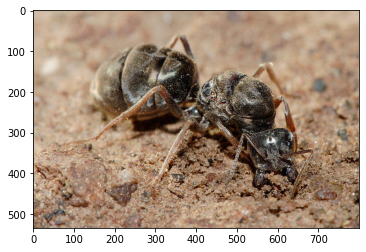

In [31]:
plt.imshow(test_img)

In [34]:
test_img.shape

(534, 800, 3)

In [32]:
model.predict(test_img)

ValueError: in user code:

    File "D:\LIVE_CLASS\FSDS_FEB\Codebase\FSDS_VGG_16_demo\env\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "D:\LIVE_CLASS\FSDS_FEB\Codebase\FSDS_VGG_16_demo\env\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\LIVE_CLASS\FSDS_FEB\Codebase\FSDS_VGG_16_demo\env\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "D:\LIVE_CLASS\FSDS_FEB\Codebase\FSDS_VGG_16_demo\env\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "D:\LIVE_CLASS\FSDS_FEB\Codebase\FSDS_VGG_16_demo\env\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\LIVE_CLASS\FSDS_FEB\Codebase\FSDS_VGG_16_demo\env\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 800, 3)


In [40]:
tf.image.resize(test_img, (224, 224)).shape

TensorShape([224, 224, 3])

In [41]:
resized_img = tf.image.resize(test_img, (224, 224))

In [42]:
model.predict(resized_img)

ValueError: in user code:

    File "D:\LIVE_CLASS\FSDS_FEB\Codebase\FSDS_VGG_16_demo\env\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "D:\LIVE_CLASS\FSDS_FEB\Codebase\FSDS_VGG_16_demo\env\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\LIVE_CLASS\FSDS_FEB\Codebase\FSDS_VGG_16_demo\env\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "D:\LIVE_CLASS\FSDS_FEB\Codebase\FSDS_VGG_16_demo\env\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "D:\LIVE_CLASS\FSDS_FEB\Codebase\FSDS_VGG_16_demo\env\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\LIVE_CLASS\FSDS_FEB\Codebase\FSDS_VGG_16_demo\env\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [46]:
input_data = tf.expand_dims(resized_img, axis=0)

In [48]:
pred = model.predict(input_data)
pred

array([[1., 0.]], dtype=float32)

In [52]:
argmax = tf.argmax(pred[0]).numpy()

In [53]:
label_map[argmax]

'ants'

In [54]:
loaded_model = tf.keras.models.load_model("./trained_model.h5")

In [56]:
preprocessd_img= tf.keras.applications.vgg16.preprocess_input(resized_img)

In [57]:
preprocessd_img.shape

TensorShape([224, 224, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


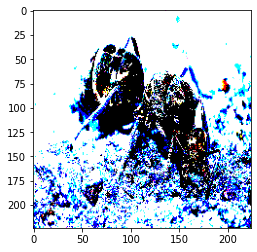

In [58]:
plt.imshow(preprocessd_img)

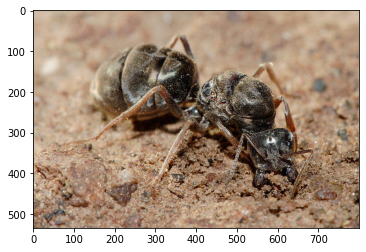

In [59]:
plt.imshow(test_img)


In [62]:
full_model = 138_357_544
our_model = 14_714_688

In [64]:
type(full_model)

int

In [63]:
our_model/full_model

0.10635262505093325